In [ ]:
!nvidia-smi

Thu Apr 13 14:59:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)
!pip install ultralytics

from IPython import display

import ultralytics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.6/509.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 14.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

download the data in the next cell

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="past your key here!")
project = rf.workspace("dfyv7").project("guns-detection-security-camera")
dataset = project.version(1).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.75, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to guns-detection(security-camera)-1 in yolov8:: 100%|██████████| 2542/2542 [00:00<00:00, 2603.81it/s]


## Custom Training

In [ ]:
pwd


'/content'

In [ ]:
%cd {HOME}
# the path to the data.yaml file may vary so adjust it properly
!yolo task=detect mode=train model=yolov8l.pt data=/content/guns-detection/data.yaml epochs=40 imgsz=640

/content
100% 83.7M/83.7M [00:00<00:00, 230MB/s]
Ultralytics YOLOv8.0.75 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/guns-detection/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

In [ ]:
!ls /content/runs/detect/train

args.yaml					    results.csv
confusion_matrix.png				    results.png
events.out.tfevents.1681399199.254b30197520.5524.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights
R_curve.png


/content


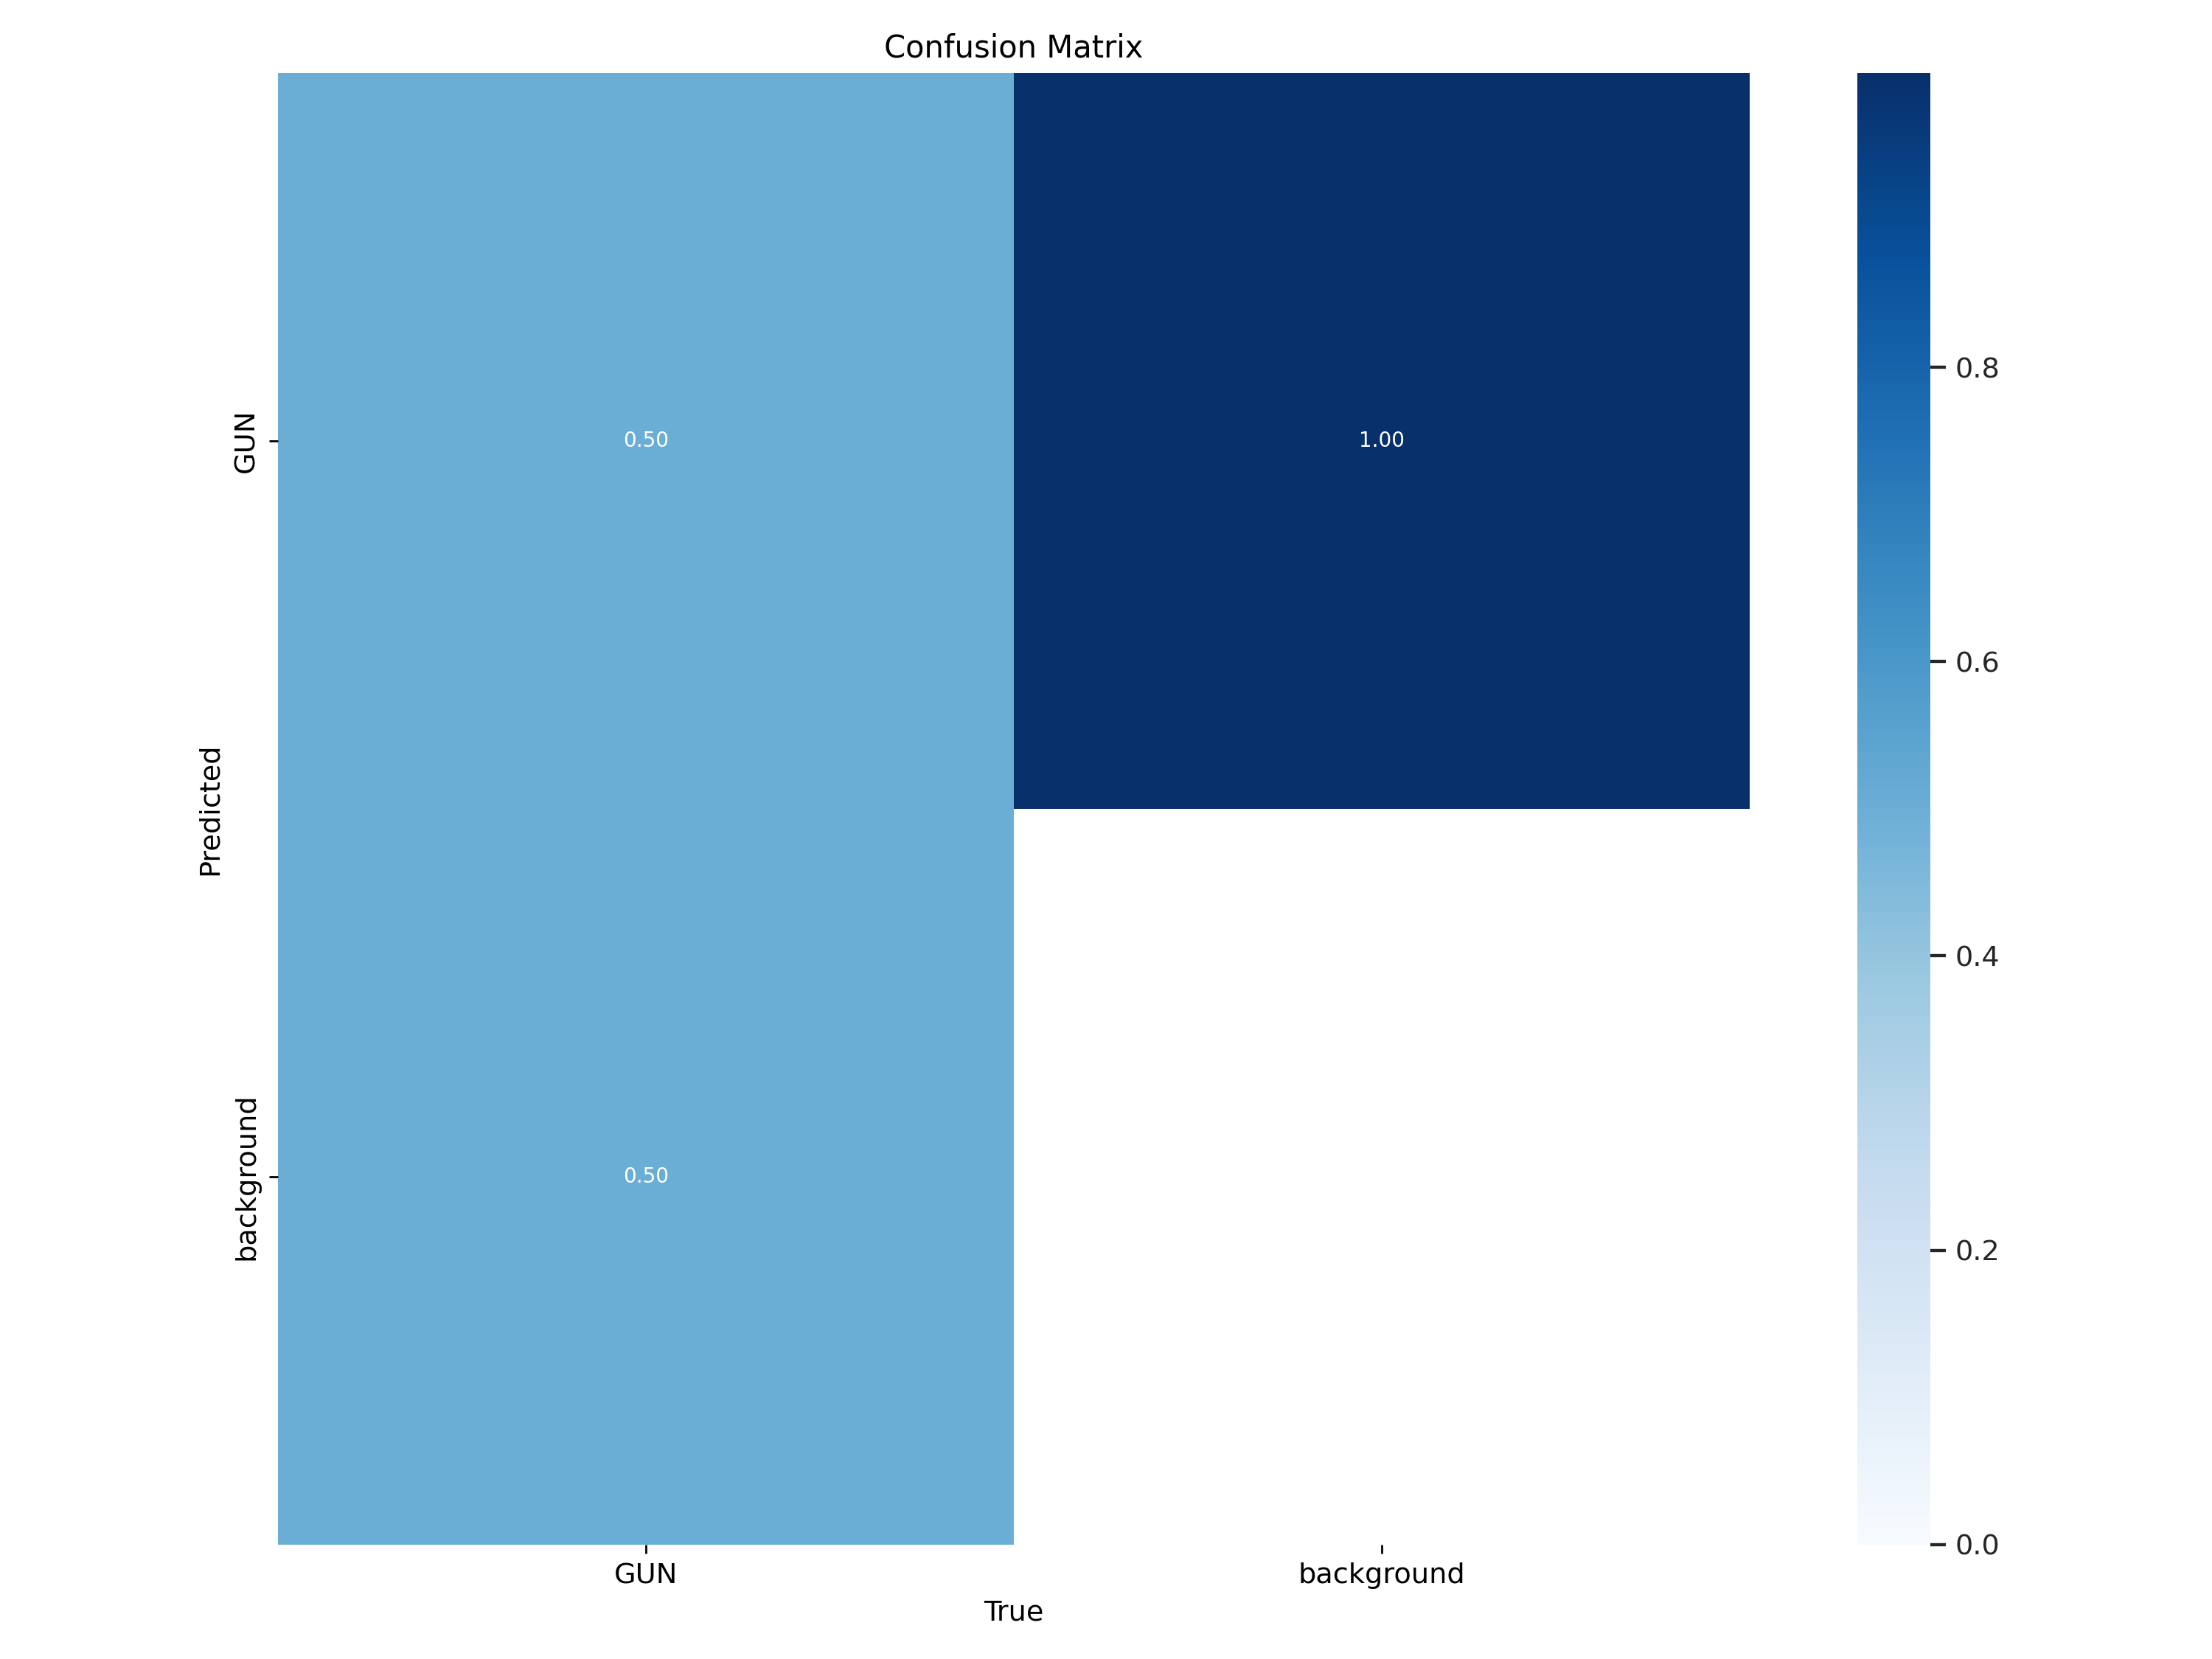

In [ ]:
%cd {HOME}
Image('/content/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


## Validate Custom Model

In [ ]:
%cd {HOME}
# the path to the data.yaml file may vary so adjust it properly
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/guns-detection/data.yaml

/content
Ultralytics YOLOv8.0.75 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/guns-detection/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100% 22/22 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.36it/s]
                   all         22         24      0.597        0.5      0.498      0.187
Speed: 5.6ms preprocess, 39.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/guns-detection/test/images save =True

/content
Ultralytics YOLOv8.0.75 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/25 /content/guns-detection/test/images/frame3960_jpg.rf.afe066efa9a67257026662d30c4870e5.jpg: 640x640 1 GUN, 61.6ms
image 2/25 /content/guns-detection/test/images/frame_a15a1436_jpg.rf.41a5251259cb5c3fb0a56e395ce7ee52.jpg: 640x640 (no detections), 40.5ms
image 3/25 /content/guns-detection/test/images/frame_a19a254_jpg.rf.b718253d142e8f893b1638aacc526cc0.jpg: 640x640 1 GUN, 39.6ms
image 4/25 /content/guns-detection/test/images/frame_a20a1121_jpg.rf.3c4fa02db51b7fd0bf377bb0b90a33a2.jpg: 640x640 1 GUN, 36.3ms
image 5/25 /content/guns-detection/test/images/frame_a27a1745_jpg.rf.e49d463419efcbe9abea26d7519c25de.jpg: 640x640 2 GUNs, 35.5ms
image 6/25 /content/guns-detection/test/images/frame_a28a222_jpg.rf.33758dd25deb24386cb9b50627808129.jpg: 640x640 1 GUN, 35.4ms
image 7/25 /content/guns-detection/test/imag

**NOTE:** Let's take a look at few results.

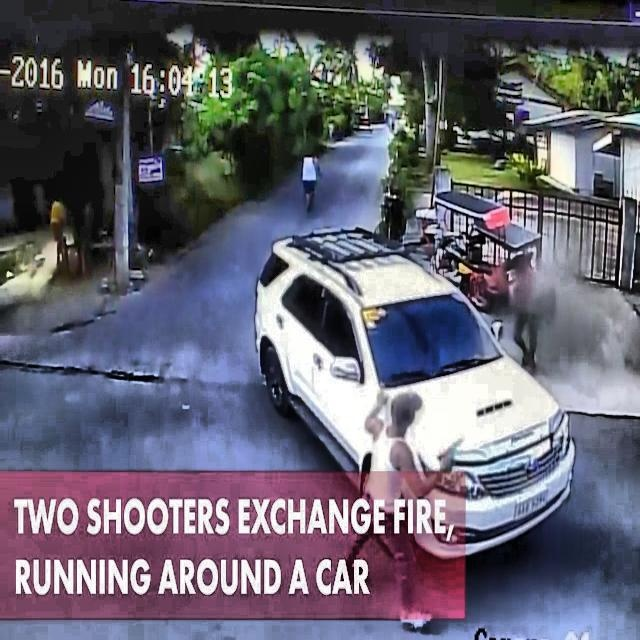

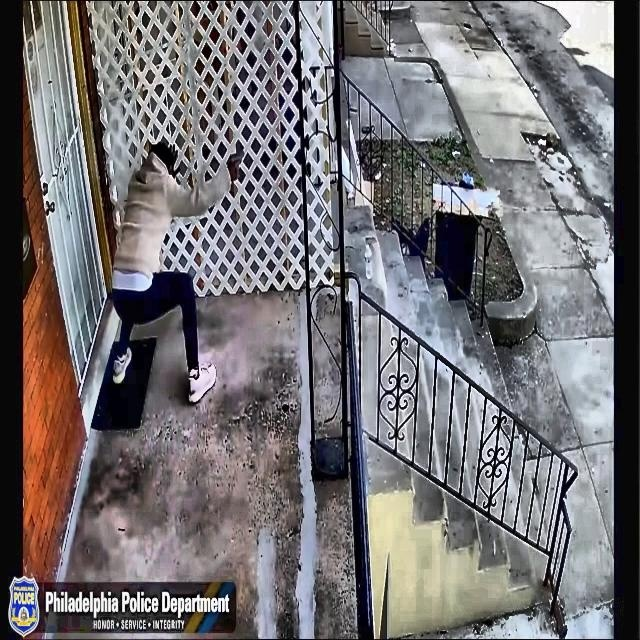

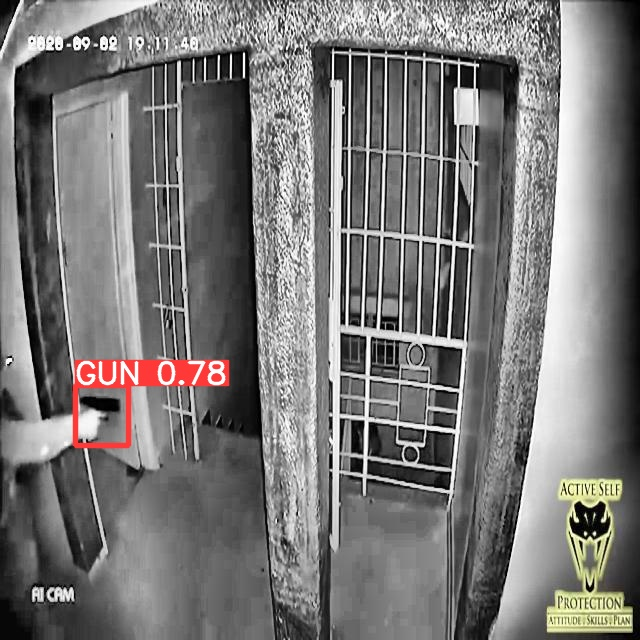

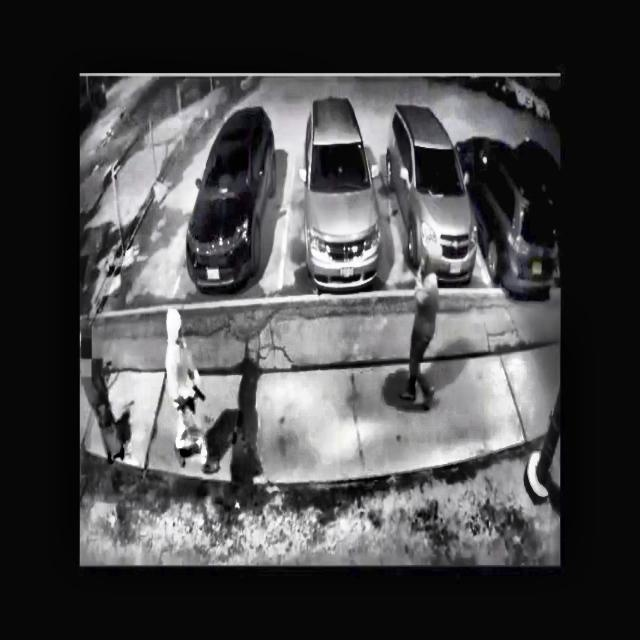

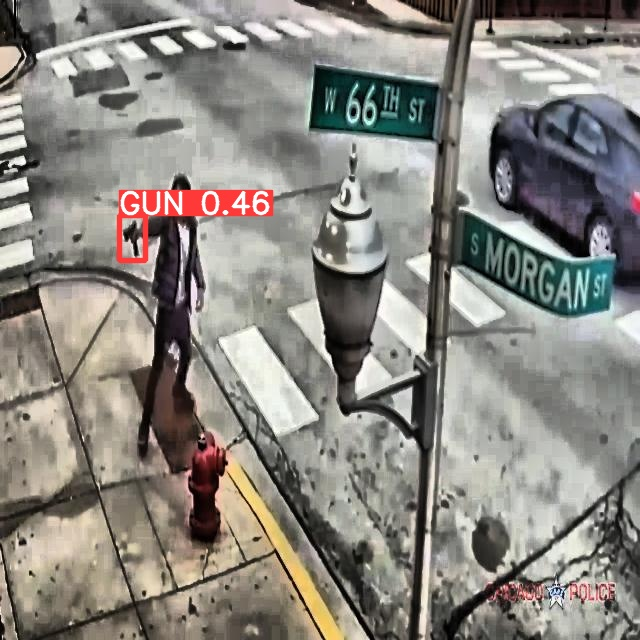

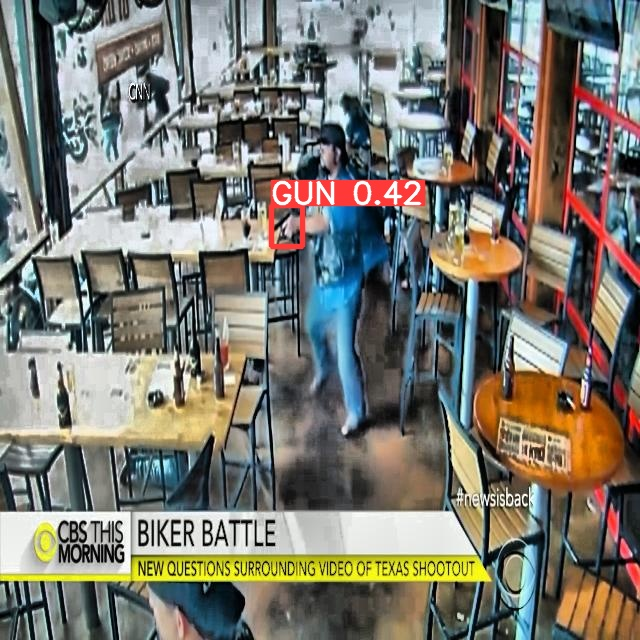

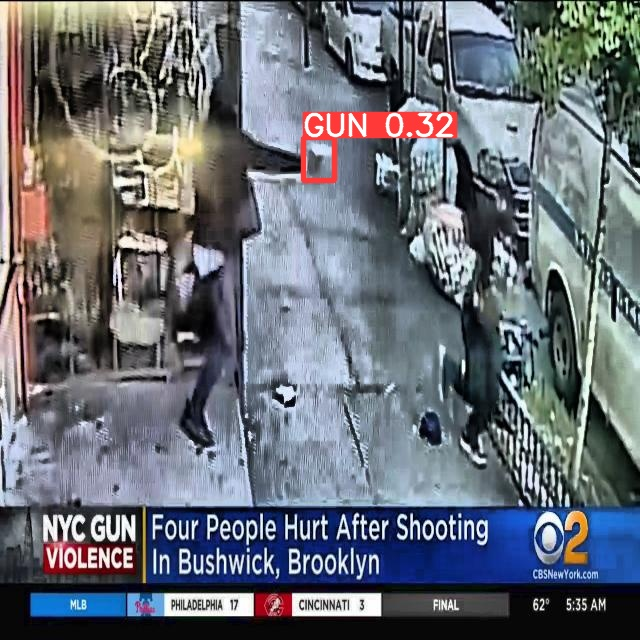

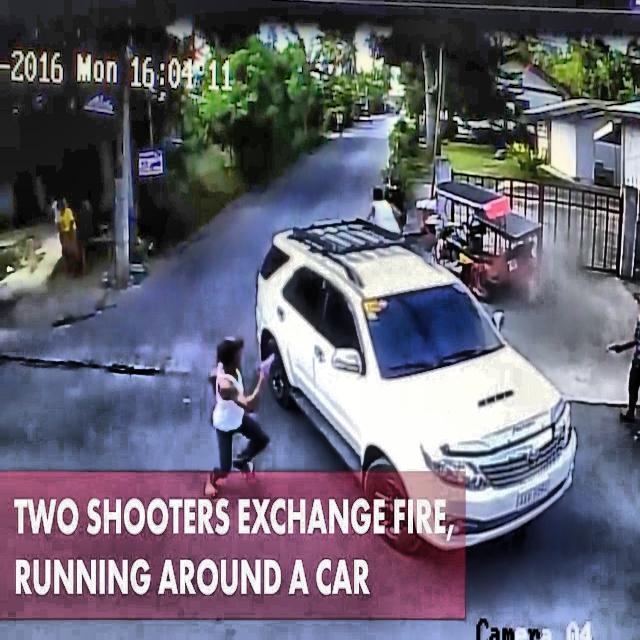

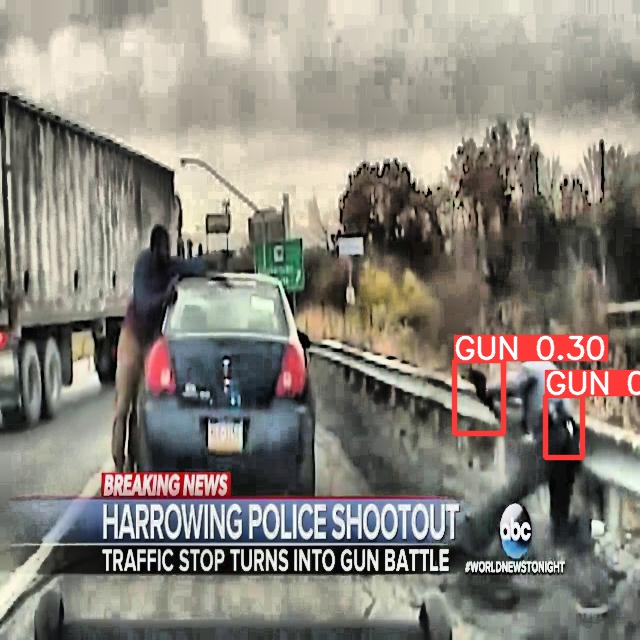

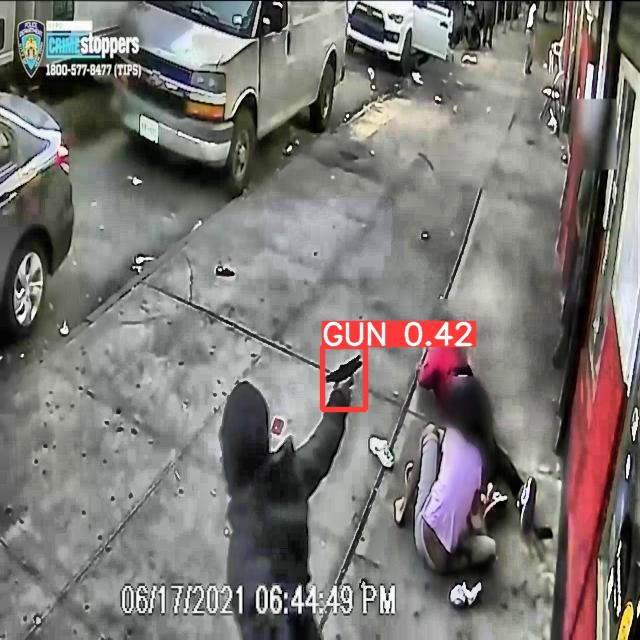

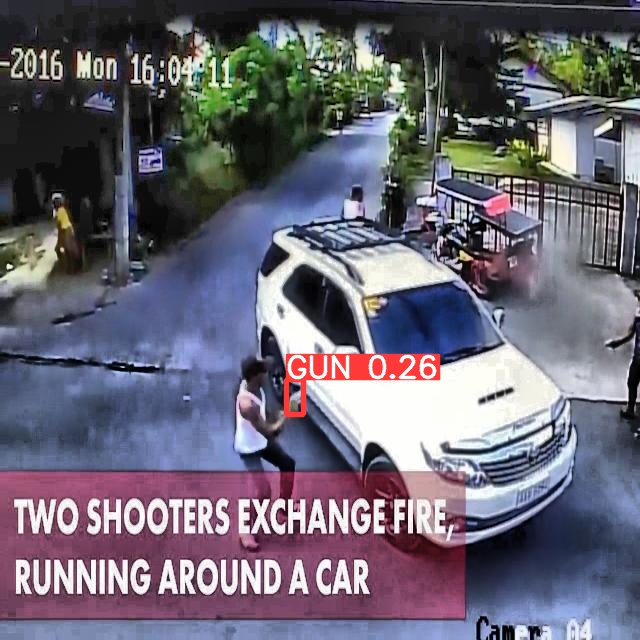

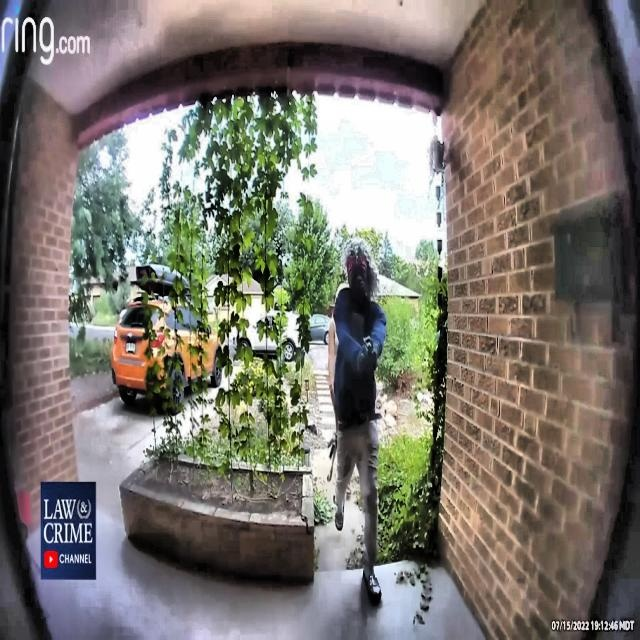

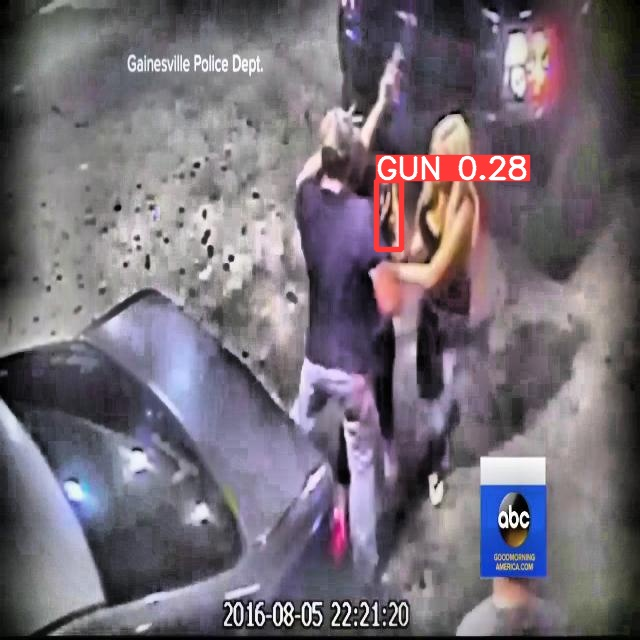

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")